In [22]:
import pandas as pd

In [23]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label']

df = pd.read_csv("pima.csv", header=None, names=col_names)

In [24]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']


X = df[feature_cols]

y = df.label

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred_class = logreg.predict(X_test)

In [29]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


In [30]:
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [31]:
y_test.mean()

0.3229166666666667

In [32]:
1 - y_test.mean()

0.6770833333333333

In [33]:

max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [34]:

y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: label, dtype: float64

In [35]:

print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
False: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [37]:
confusion_matrix(y_test,y_pred_class)

array([[118,  12],
       [ 47,  15]], dtype=int64)

In [38]:

confusion = confusion_matrix(y_test, y_pred_class)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[118  12]
 [ 47  15]]


In [39]:
print((TP + TN) / float(TP + TN + FP + FN))

0.6927083333333334


In [40]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


Sensitivity: When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
Also known as "True Positive Rate" or "Recall"
TP / all positive
all positive = TP + FN

In [41]:
specificity = TN / (TN + FP)

print(specificity)

0.9076923076923077


Specificity: When the actual value is negative, how often is the prediction correct?

Something we want to maximize
How "specific" (or "selective") is the classifier in predicting positive instances?
TN / all negative
all negative = TN + FP

Our classifier

Highly specific
Not sensitive

In [42]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.09230769230769231
0.09230769230769231


In [43]:
#Precision: When a positive value is predicted, how often is the prediction correct?

#How "precise" is the classifier when predicting positive instances?
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556


Conclusion:

Confusion matrix gives you a more complete picture of how your classifier is performing
Also allows you to compute various classification metrics, and these metrics can guide your model selection
Which metrics should you focus on?

Choice of metric depends on your business objective
Identify if FP or FN is more important to reduce
Choose metric with relevant variable (FP or FN in the equation)
Spam filter (positive class is "spam"):
Optimize for precision or specificity
precision
false positive as variable
specificity
false positive as variable
Because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
Fraudulent transaction detector (positive class is "fraud"):
Optimize for sensitivity
FN as a variable
Because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

In [44]:
logreg.predict_proba(X_test)[0:10]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [45]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [46]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [47]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

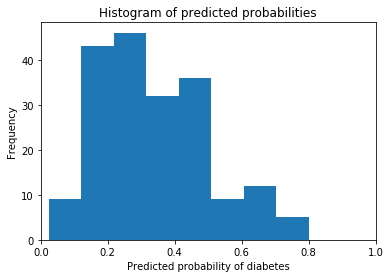

In [48]:

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

We can see from the third bar
About 45% of observations have probability from 0.2 to 0.3
Small number of observations with probability > 0.5
This is below the threshold of 0.5
Most would be predicted "no diabetes" in this case

Solution
Decrease the threshold for predicting diabetes
Increase the sensitivity of the classifier
This would increase the number of TP
More sensitive to positive instances
Example of metal detector
Threshold set to set off alarm for large object but not tiny objects
YES: metal, NO: no metal
We lower the threshold amount of metal to set it off
It is now more sensitive to metal
It will then predict YES more often

In [49]:

# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
y_pred_class = binarize(y_pred_prob, 0.3)[0]

ValueError: Expected 2D array, got 1D array instead:
array=[0.36752429 0.28356344 0.28895886 0.4141062  0.15896027 0.17065156
 0.49889026 0.51341541 0.27678612 0.67189438 0.35755557 0.74087965
 0.36050235 0.23012363 0.42654231 0.19103515 0.45763601 0.1190141
 0.43928953 0.36961151 0.44187989 0.37611662 0.19816022 0.41677304
 0.15548281 0.2531671  0.09743077 0.69633712 0.15358309 0.2197836
 0.43094832 0.34216058 0.22396114 0.38073543 0.13342134 0.38790216
 0.47049703 0.16204743 0.29548176 0.30918161 0.27299705 0.38816583
 0.27353443 0.28881041 0.63471914 0.02365251 0.15820648 0.23018375
 0.3484593  0.27580041 0.33264104 0.24880596 0.74489512 0.39001464
 0.41625545 0.13575687 0.18895376 0.64777682 0.18922131 0.05685904
 0.63991547 0.46636382 0.1250972  0.26957602 0.24919104 0.30570396
 0.46376224 0.20963095 0.42847829 0.40762264 0.20169096 0.27027066
 0.26255856 0.57238263 0.45467041 0.27716152 0.58001281 0.41599488
 0.27276101 0.34099223 0.54626578 0.37930723 0.2992205  0.10059169
 0.32872602 0.45101363 0.16036979 0.4896975  0.63230508 0.40738404
 0.19794397 0.19698021 0.24463208 0.11147185 0.4158597  0.21561856
 0.54124529 0.48803602 0.64652767 0.33940658 0.54263427 0.16213824
 0.3778741  0.11311287 0.34781987 0.34042784 0.1790985  0.21324812
 0.14710946 0.23014102 0.18404592 0.52224649 0.47099366 0.28884248
 0.49325079 0.41744473 0.22915008 0.27022911 0.19243924 0.7498713
 0.46500093 0.6645454  0.42098599 0.53564034 0.16034702 0.1435686
 0.38142426 0.33827314 0.3630065  0.12842531 0.28333693 0.04005558
 0.18481139 0.66716947 0.46352874 0.48715682 0.19910794 0.45861651
 0.23216721 0.18369267 0.26391994 0.37492969 0.12916506 0.41413913
 0.42460858 0.13832191 0.20781694 0.29477699 0.15825099 0.36016234
 0.23741449 0.43350689 0.20619881 0.23162338 0.61111541 0.19731009
 0.80071498 0.17808491 0.36488735 0.78618643 0.44080614 0.36559654
 0.11760138 0.22843325 0.47865069 0.21320525 0.51498521 0.16122494
 0.23740119 0.29374391 0.16670048 0.48716526 0.29969894 0.44651043
 0.50169902 0.29246506 0.61736228 0.41593995 0.25820945 0.1741968
 0.33519541 0.69606825 0.32454368 0.35730426 0.2336947  0.23738524
 0.38409318 0.24691412 0.27954552 0.18501174 0.2622362  0.27856926].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

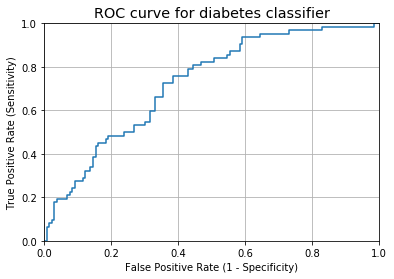

In [50]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [51]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [52]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


In [53]:
evaluate_threshold(0.5)

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


AUC is the percentage of the ROC plot that is underneath the curve:

In [54]:
 #IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7245657568238213


AUC is useful as a single number summary of classifier performance
Higher value = better classifier
If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation
AUC is useful even when there is high class imbalance (unlike classification accuracy)
Fraud case
Null accuracy almost 99%

In [55]:
# calculate cross-validated AUC
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score

cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

0.7378233618233618

Use both of these whenever possible

Confusion matrix advantages:

Allows you to calculate a variety of metrics
Useful for multi-class problems (more than two response classes)


ROC/AUC advantages:

Does not require you to set a classification threshold
Still useful when there is high class imbalance

In [56]:
from sklearn.externals import joblib
joblib.dump(logreg,'Project10_PIMADiabetes.pkl')

C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Project10_PIMADiabetes.pkl']